In [1]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [3]:
CHL = pd.read_csv('./magazine/final/CHL_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [4]:
CHL['ADFN_2'] = CHL['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(', ')

In [5]:
CHL['ADFN_2']

0                           [메탈, 레진, 귀고리, CHANEL, CHANEL]
1       [인스타그램, 에디터, 디자이너, 인, 플루, 계정, 막, 시작, 가을, 겨울, 상...
2                        [체인, 진주, 결합, 우아함을, CHANEL, 액세서리]
3       [주변, 친구, 좋아하고, 사고, 익숙한, 브랜드, 뭐, 있지, CHANEL, 에르...
4       [컬러, 블록, 조화로운, 부츠, CHANEL, CHANEL, 와인, 색, 하이, ...
                              ...                        
1642    [밀란, 패션위크, 참석, 차, 출국, 리사, 공항, BLACKPINK, 리사, 오...
1643    [리사, 패션, 브랜드, 탄생, 할, 보인다, YG, 엔터테인먼트, BLACKPIN...
1644    [서로, 팬임, 인증, 두, 스타, BLACKPINK, 세레나, 고메즈, 함께한, ...
1645    [내셔널, 아이스크림, 데이, 기념, BLACKPINK, 귀여운, 포스팅, 제니, ...
1646    [한국, 신진, 디자이너, 하이, 패션, 브랜드, 섭렵, 블핑, BLACKPINK,...
Name: ADFN_2, Length: 1647, dtype: object

### top50 리스트 생성

In [6]:
top500 = pd.read_csv('./CHL_top500.csv', sep='|', encoding = 'utf-8')

In [7]:
top500

,word,count
0,CHANEL,5473
1,리사,3581
2,브랜드,985
3,KARL,882
4,모델,777
...,...,...
495,리츠,70
496,가운,70
497,관계,70
498,중고,69


In [8]:
top30 = []
for i in range(30):
    top30.append(top500.loc[i, 'word'])
    
print(len(top30))
print(top30)

30
['CHANEL', '리사', '브랜드', 'KARL', '모델', '쇼', '장식', '백', '예쁘다', '드레스', '스타일', '룩', '컬러', '파리', '귀엽다', '블랙', '여성', '사랑', '트위드', '춤', '재킷', '디자이너', '디자인', 'COUTURE', '매력', '주얼리', '세계', '아이템', '코코', '새로운']


In [9]:
top50 = []
for i in range(50):
    top50.append(top500.loc[i, 'word'])
    
print(len(top50))
print(top50)

50
['CHANEL', '리사', '브랜드', 'KARL', '모델', '쇼', '장식', '백', '예쁘다', '드레스', '스타일', '룩', '컬러', '파리', '귀엽다', '블랙', '여성', '사랑', '트위드', '춤', '재킷', '디자이너', '디자인', 'COUTURE', '매력', '주얼리', '세계', '아이템', '코코', '새로운', '한국', '하우스', '무대', '화이트', '옷', '시작', 'GABRIELLE', '공방', '다양한', '럭셔리', '크루즈', '영감', '랩', 'VIRGINIE', '영화', '스커트', '디렉터', '눈', '팬츠', '프랑스']


### top100

In [10]:
top100 = []
for i in range(100):
    top100.append(top500.loc[i, 'word'])
    
print(len(top100))
print(top100)

100
['CHANEL', '리사', '브랜드', 'KARL', '모델', '쇼', '장식', '백', '예쁘다', '드레스', '스타일', '룩', '컬러', '파리', '귀엽다', '블랙', '여성', '사랑', '트위드', '춤', '재킷', '디자이너', '디자인', 'COUTURE', '매력', '주얼리', '세계', '아이템', '코코', '새로운', '한국', '하우스', '무대', '화이트', '옷', '시작', 'GABRIELLE', '공방', '다양한', '럭셔리', '크루즈', '영감', '랩', 'VIRGINIE', '영화', '스커트', '디렉터', '눈', '팬츠', '프랑스', '골드', '완성', '얼굴', '슈즈', '봄', '처음', '노래', '느낌', '가방', '여름', '영어', '링', '가죽', '클래식', '패션쇼', '많은', 'HAUTE', '첫', '부츠', '착용', '슈트', '런웨이', '사용', '코트', '워치', '핑크', '시대', '여자', '의상', '로고', '대표', '데님', '팔레', '라인', '분위기', '중국', '패턴', '프라다', '순간', '크리에이티브', '가을', '이자', '향수', '작업', '스타일링', '아이돌', '미국', '자리', '참석', '겨울']


In [11]:
top200 = []
for i in range(200):
    top200.append(top500.loc[i, 'word'])
    
print(len(top200))
print(top200)

200
['CHANEL', '리사', '브랜드', 'KARL', '모델', '쇼', '장식', '백', '예쁘다', '드레스', '스타일', '룩', '컬러', '파리', '귀엽다', '블랙', '여성', '사랑', '트위드', '춤', '재킷', '디자이너', '디자인', 'COUTURE', '매력', '주얼리', '세계', '아이템', '코코', '새로운', '한국', '하우스', '무대', '화이트', '옷', '시작', 'GABRIELLE', '공방', '다양한', '럭셔리', '크루즈', '영감', '랩', 'VIRGINIE', '영화', '스커트', '디렉터', '눈', '팬츠', '프랑스', '골드', '완성', '얼굴', '슈즈', '봄', '처음', '노래', '느낌', '가방', '여름', '영어', '링', '가죽', '클래식', '패션쇼', '많은', 'HAUTE', '첫', '부츠', '착용', '슈트', '런웨이', '사용', '코트', '워치', '핑크', '시대', '여자', '의상', '로고', '대표', '데님', '팔레', '라인', '분위기', '중국', '패턴', '프라다', '순간', '크리에이티브', '가을', '이자', '향수', '작업', '스타일링', '아이돌', '미국', '자리', '참석', '겨울', '머리', '선택', '배우', '최고', '점', '상징', '캠페인', '체인', '뉴욕', '태국', '세', '하이', '스타', '예정', 'CELINE', '톱', '촬영', '제작', '책', '레드', '실루엣', '인기', '액세서리', '있었다', '좋은', '미니', '다이아몬드', '퍼렐', '향', '판매', '이후', '사이즈', '칼', '트렌드', '패션계', '스', '진행', '포인트', '마지막', 'J', '자수', '매장', '한국어', '현재', '펜디', '재', '손', '그룹', '채', '남성', '약', '방식', '비율', '꽃', '한국인', '이미지', '볼'

In [12]:
top300 = []
for i in range(300):
    top300.append(top500.loc[i, 'word'])
    
print(len(top300))
print(top300)

300
['CHANEL', '리사', '브랜드', 'KARL', '모델', '쇼', '장식', '백', '예쁘다', '드레스', '스타일', '룩', '컬러', '파리', '귀엽다', '블랙', '여성', '사랑', '트위드', '춤', '재킷', '디자이너', '디자인', 'COUTURE', '매력', '주얼리', '세계', '아이템', '코코', '새로운', '한국', '하우스', '무대', '화이트', '옷', '시작', 'GABRIELLE', '공방', '다양한', '럭셔리', '크루즈', '영감', '랩', 'VIRGINIE', '영화', '스커트', '디렉터', '눈', '팬츠', '프랑스', '골드', '완성', '얼굴', '슈즈', '봄', '처음', '노래', '느낌', '가방', '여름', '영어', '링', '가죽', '클래식', '패션쇼', '많은', 'HAUTE', '첫', '부츠', '착용', '슈트', '런웨이', '사용', '코트', '워치', '핑크', '시대', '여자', '의상', '로고', '대표', '데님', '팔레', '라인', '분위기', '중국', '패턴', '프라다', '순간', '크리에이티브', '가을', '이자', '향수', '작업', '스타일링', '아이돌', '미국', '자리', '참석', '겨울', '머리', '선택', '배우', '최고', '점', '상징', '캠페인', '체인', '뉴욕', '태국', '세', '하이', '스타', '예정', 'CELINE', '톱', '촬영', '제작', '책', '레드', '실루엣', '인기', '액세서리', '있었다', '좋은', '미니', '다이아몬드', '퍼렐', '향', '판매', '이후', '사이즈', '칼', '트렌드', '패션계', '스', '진행', '포인트', '마지막', 'J', '자수', '매장', '한국어', '현재', '펜디', '재', '손', '그룹', '채', '남성', '약', '방식', '비율', '꽃', '한국인', '이미지', '볼'

In [13]:
t500 = []
for i in range(500):
    t500.append(top500.loc[i, 'word'])
    
print(len(t500))
print(t500[:91])

500
['CHANEL', '리사', '브랜드', 'KARL', '모델', '쇼', '장식', '백', '예쁘다', '드레스', '스타일', '룩', '컬러', '파리', '귀엽다', '블랙', '여성', '사랑', '트위드', '춤', '재킷', '디자이너', '디자인', 'COUTURE', '매력', '주얼리', '세계', '아이템', '코코', '새로운', '한국', '하우스', '무대', '화이트', '옷', '시작', 'GABRIELLE', '공방', '다양한', '럭셔리', '크루즈', '영감', '랩', 'VIRGINIE', '영화', '스커트', '디렉터', '눈', '팬츠', '프랑스', '골드', '완성', '얼굴', '슈즈', '봄', '처음', '노래', '느낌', '가방', '여름', '영어', '링', '가죽', '클래식', '패션쇼', '많은', 'HAUTE', '첫', '부츠', '착용', '슈트', '런웨이', '사용', '코트', '워치', '핑크', '시대', '여자', '의상', '로고', '대표', '데님', '팔레', '라인', '분위기', '중국', '패턴', '프라다', '순간', '크리에이티브', '가을']


### top50만 남기기

In [14]:
len(CHL)

1647

In [15]:
top30_word = []
for i in range(len(CHL)):
    w=[]
    for word in CHL.loc[i, 'ADFN_2']:
        if word in top30:
            w.append(word)
    top30_word.append(w)

In [16]:
top50_word = []
for i in range(len(CHL)):
    w=[]
    for word in CHL.loc[i, 'ADFN_2']:
        if word in top50:
            w.append(word)
    top50_word.append(w)

In [17]:
top100_word = []
for i in range(len(CHL)):
    w=[]
    for word in CHL.loc[i, 'ADFN_2']:
        if word in top100:
            w.append(word)
    top100_word.append(w)

In [18]:
top200_word = []
for i in range(len(CHL)):
    w=[]
    for word in CHL.loc[i, 'ADFN_2']:
        if word in top200:
            w.append(word)
    top200_word.append(w)

In [19]:
top300_word = []
for i in range(len(CHL)):
    w=[]
    for word in CHL.loc[i, 'ADFN_2']:
        if word in top300:
            w.append(word)
    top300_word.append(w)

In [20]:
top500_word = []
for i in range(len(CHL)):
    w=[]
    for word in CHL.loc[i, 'ADFN_2']:
        if word in t500:
            w.append(word)
    top500_word.append(w)

### 전체

In [21]:
CHL

,magazine,brand,title,word,ADFN,ADFN_2
0,A,Ch,"가을 트렌드 컬러, 위대한 블랙의 위로","메탈과 레진으로 만든 귀고리는 가격미정, CHANEL(CHANEL).","['메탈', '레진', '귀고리', 'CHANEL', 'CHANEL']","[메탈, 레진, 귀고리, CHANEL, CHANEL]"
1,A,Ch,빈티지 쇼핑의 시대,"당장 인스타그램을 열어 패션 에디터, 디자이너, 인플루언서의 계정을 열어보길. 지금...","['인스타그램', '에디터', '디자이너', '인', '플루', '계정', '막',...","[인스타그램, 에디터, 디자이너, 인, 플루, 계정, 막, 시작, 가을, 겨울, 상..."
2,A,Ch,"올가을 시즌의 주인공, 체인의 활약",체인과 진주의 결합으로 우아함을 배가한 CHANEL의 액세서리들.,"['체인', '진주', '결합', '우아함을', 'CHANEL', '액세서리']","[체인, 진주, 결합, 우아함을, CHANEL, 액세서리]"
3,A,Ch,"주식을 시작한 패션 에디터의 이야기, 나는 주주다","생각해보자. 나와 주변 친구들이 좋아하고 사고 싶은, 그리고 익숙한 브랜드가 뭐가 ...","['주변', '친구', '좋아하고', '사고', '익숙한', '브랜드', '뭐', ...","[주변, 친구, 좋아하고, 사고, 익숙한, 브랜드, 뭐, 있지, CHANEL, 에르..."
4,A,Ch,가을의 그림자만큼 길어진 롱부츠 12가지,"컬러블록이 조화로운 부츠는 가격미정, CHANEL(CHANEL). 와인색 니하이...","['컬러', '블록', '조화로운', '부츠', 'CHANEL', 'CHANEL',...","[컬러, 블록, 조화로운, 부츠, CHANEL, CHANEL, 와인, 색, 하이, ..."
...,...,...,...,...,...,...
1642,W,L,밀라노로 떠난 리사,"밀란 패션위크 참석차 출국한 리사의 공항 룩., BLACKPINK 리사가 오늘 2월...","['밀란', '패션위크', '참석', '차', '출국', '리사', '공항', 'B...","[밀란, 패션위크, 참석, 차, 출국, 리사, 공항, BLACKPINK, 리사, 오..."
1643,W,L,리사의 새로운 행보,", , 리사의 패션 브랜드가 탄생할 것으로 보인다. YG엔터테인먼트가 2019년 ...","['리사', '패션', '브랜드', '탄생', '할', '보인다', 'YG', '엔...","[리사, 패션, 브랜드, 탄생, 할, 보인다, YG, 엔터테인먼트, BLACKPIN..."
1644,W,L,"블랙핑크X세레나 고메즈 영상통화, 협업 티징","서로의 팬임을 인증한 두 스타, 8월 28일 BLACKPINK와 세레나 고메즈가 함...","['서로', '팬임', '인증', '두', '스타', 'BLACKPINK', '세레...","[서로, 팬임, 인증, 두, 스타, BLACKPINK, 세레나, 고메즈, 함께한, ..."
1645,W,L,블랙핑크가 아이스크림 셀카를 올린 이유는?,"내셔널 아이스크림 데이’를 기념한 BLACKPINK의 귀여운 포스팅., 제니와 리사...","['내셔널', '아이스크림', '데이', '기념', 'BLACKPINK', '귀여운...","[내셔널, 아이스크림, 데이, 기념, BLACKPINK, 귀여운, 포스팅, 제니, ..."


### item 남기기

In [129]:
item = ['백', '드레스', '재킷', '주얼리', '옷', '슈즈', '스커트', '링', '팬츠', '가방', '슈트', '향수', '의상', '데님', '액세서리', '톱',
'셔츠', '모자', '수트', '스니커즈', '니트', '시계', '워치', '핸드백', '벨트', '선글라스', '목걸이', '티셔츠', '쇼츠', '샌들',
 '귀고리', '워치', '코트', '부츠', '케이프']

In [22]:
# item_word = []
# for i in range(len(mag_je)):
#     w=[]
#     for word in mag_je.loc[i, 'ADFN']:
#         if word in item:
#             w.append(word)
#     item_word.append(w)

### top100이면서 item이 아닌 것

In [23]:
# top100_not_item_word = []
# for i in range(len(tot_je)):
#     w=[]
#     for word in tot_je.loc[i, 'ADFN']:
#         if word in top100:
#             if word not in item:
#                 w.append(word)
#     top100_not_item_word.append(w)

In [24]:
# len(top100_not_item_word)

In [25]:
# top100_not_item_word[1]

In [26]:
# top50_word

In [28]:
len(top50_word)

1647

### 텍스트 한줄씩 읽어와 dataset에 기록

### 어프라이어리(Apriori) 알고리즘을 적용하여 연관규칙 분석 수행

In [29]:
# 어프라이어리(Apriori)
from apyori import apriori

In [30]:
top30_word[0]

['CHANEL', 'CHANEL']

In [101]:
# 지지도(support) : P(A∩B)
result = list(apriori(top500_word, min_support = 0.04))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x:len(x))
df = df[(df['length'] == 2) 
        & (df['support'] >= 0.01)].sort_values(by='support', ascending = False)
df.head(10)

,items,support,ordered_statistics,length
413,"(CHANEL, 브랜드)",0.257438,"[((), (CHANEL, 브랜드), 0.25743776563448695, 1.0)...",2
503,"(장식, CHANEL)",0.211900,"[((), (장식, CHANEL), 0.2119004250151791, 1.0), ...",2
438,"(CHANEL, 쇼)",0.185792,"[((), (CHANEL, 쇼), 0.18579234972677597, 1.0), ...",2
388,"(모델, CHANEL)",0.185185,"[((), (모델, CHANEL), 0.18518518518518517, 1.0),...",2
546,"(CHANEL, 파리)",0.182149,"[((), (CHANEL, 파리), 0.18214936247723132, 1.0),...",2
365,"(드레스, CHANEL)",0.179114,"[((), (드레스, CHANEL), 0.17911353976927746, 1.0)...",2
446,"(CHANEL, 스타일)",0.171828,"[((), (CHANEL, 스타일), 0.17182756527018822, 1.0)...",2
329,"(KARL, CHANEL)",0.165149,"[((), (KARL, CHANEL), 0.16514875531268974, 1.0...",2
368,"(CHANEL, 디자인)",0.161506,"[((), (CHANEL, 디자인), 0.16150576806314512, 1.0)...",2
403,"(CHANEL, 백)",0.159077,"[((), (CHANEL, 백), 0.15907710989678203, 1.0), ...",2


In [102]:
for item in df['items']:
    if '리사' in item:
        print(item)

frozenset({'패션', '리사'})


### networkx 그래프 정의

In [103]:
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)

In [104]:
# 페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [105]:
pos = nx.spring_layout(G)

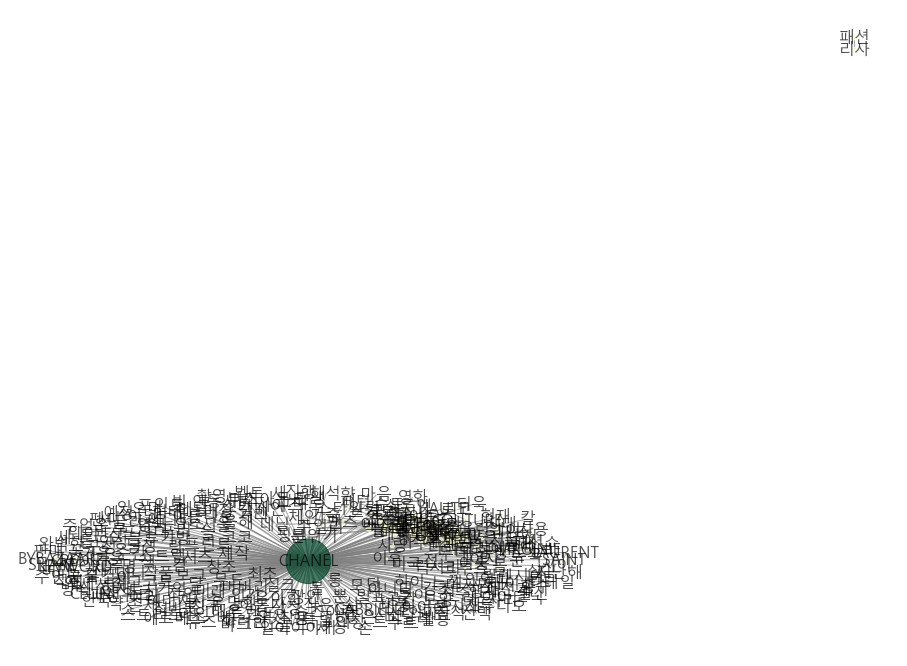

In [106]:
plt.figure(figsize = (16, 12)) ; plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 16,
                pos = pos, node_color = list(pr.values()), node_size = nsize,
                alpha=0.7, edge_color='.5', cmap = plt.cm.YlGn)

plt.savefig('./nt_CHL_top500_mins04.png', bbox_inches = 'tight')
plt.show()
